In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
mnist = datasets.load_digits() #Loading the dataset

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(np.array(mnist.data),mnist.target, test_size=0.25, random_state=42) 

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y,test_size=0.1, random_state=84) #10% of training data is used for validation

In [ ]:
print(f"Training data points: {len(train_y)}")
print(f"Validation data points: {len(val_y)}")
print(f"Testing data points: {len(test_y)}")

Training data points: 1212
Validation data points: 135
Testing data points: 450


In [ ]:
k_values = range(1, 30, 2) #Initialize k - values
accuracies = []

In [ ]:
print("Accuracy for different values of k,") #Calculating accuracies for all k - values
for k in range(1, 30, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_x, train_y)
    score = model.score(val_x, val_y)
    print("For k = %d the accuracy is %.2f%%" % (k, score * 100))
    accuracies.append(score)

Accuracy for different values of k,
For k = 1 the accuracy is 99.26%
For k = 3 the accuracy is 99.26%
For k = 5 the accuracy is 99.26%
For k = 7 the accuracy is 99.26%
For k = 9 the accuracy is 99.26%
For k = 11 the accuracy is 99.26%
For k = 13 the accuracy is 99.26%
For k = 15 the accuracy is 99.26%
For k = 17 the accuracy is 98.52%
For k = 19 the accuracy is 98.52%
For k = 21 the accuracy is 97.78%
For k = 23 the accuracy is 97.04%
For k = 25 the accuracy is 97.78%
For k = 27 the accuracy is 97.04%
For k = 29 the accuracy is 97.04%


In [ ]:
i = np.argmax(accuracies) #Choosing the best k - value
print("For k = %d accuracy is %.2f%% on validation data, which is the highest" % (k_values[i],accuracies[i] * 100))

For k = 1 accuracy is 99.26% on validation data, which is the highest


In [ ]:
model = KNeighborsClassifier(n_neighbors=k_values[i])
model.fit(train_x, train_y)
predictions = model.predict(test_x)

In [ ]:
print("Classifiaction Report on Test data:")
print(classification_report(test_y, predictions))

Classifiaction Report on Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
print ("Confusion matrix:")
print(confusion_matrix(test_y,predictions))

Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  1  1  1  0  0  0 45]]


Prediction : 7


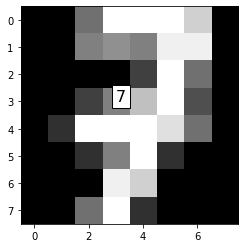

Prediction : 4


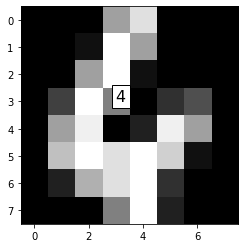

Prediction : 1


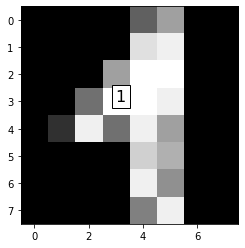

Prediction : 7


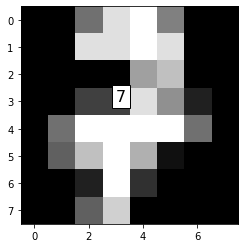

Prediction : 5


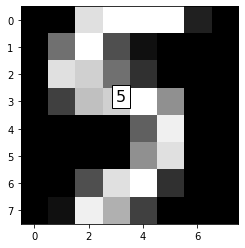

In [ ]:
for i in np.random.randint(0, high=len(test_y), size=(5,)): #Predicting for random images in the test set
         image = test_x[i]
         prediction = model.predict([image])[0]
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         print(f"Prediction : {prediction}")
         plt.show()